# Classificação com Naive Bayes, KNN e Árvore de Decisão
Este notebook implementa três algoritmos de classificação:
- Naive Bayes (GaussianNB)
- KNN (k=5)
- Árvore de decisão

Também calcula as métricas: matriz de confusão, acurácia, precisão, recall, F1-score e curva ROC.

### ALUNAS
- Gabriella Braz
- Giovana Ribeiro

In [48]:

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve)


In [49]:

data_path = Path("../../../data/tb_1.csv")
df = pd.read_csv(data_path)

print("Dimensão do dataset:", df.shape)
df.head()


Dimensão do dataset: (1000, 8)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [50]:

# Última coluna é o target
target_col = df.columns[-1]
X = df.drop(columns=[target_col])
y = df[target_col].copy()

# One-hot encoding para variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# Encode do target
le = LabelEncoder()
y_enc = le.fit_transform(y)
class_names = list(le.classes_)
print("Classes:", class_names)

# Divisão treino/teste
min_count = pd.Series(y_enc).value_counts().min()
if min_count < 2:
    strat = None
    print(f"Aviso: existe(m) classe(s) com apenas {min_count} amostra(s). Não será usado 'stratify'.")
else:
    strat = y_enc

X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.25, random_state=42, stratify=strat)

# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Classes: [np.int64(10), np.int64(15), np.int64(19), np.int64(22), np.int64(23), np.int64(27), np.int64(28), np.int64(30), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), np.int64(72), np.int64(73), np.int64(74), np.int64(75), np.int64(76), np.int64(77), np.int64(78), np.int64(79), np.int64(80), np.int64(81), np.int64(82), np.int64(83), np.int64(84), np.int64(85), np.int64(86), np.int64(87), np.int64(88), np.int64(89), np.int64(90), np.int64(91), np.int64(92), np.int64(93), np.int64(9

In [51]:
# 1. NAIVE BAYES
print("Treinando Naive Bayes...")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_pred = nb_model.predict(X_test_scaled)
nb_prob = nb_model.predict_proba(X_test_scaled)
print("Naive Bayes treinado!")

Treinando Naive Bayes...
Naive Bayes treinado!


In [52]:
# 2. KNN
print("Treinando KNN...")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_prob = knn_model.predict_proba(X_test_scaled)
print("KNN treinado!")

Treinando KNN...
KNN treinado!


In [53]:
# 3. ÁRVORE DE DECISÃO
print("Treinando Árvore de Decisão...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_prob = dt_model.predict_proba(X_test_scaled)
print("Árvore de Decisão treinada!")

Treinando Árvore de Decisão...
Árvore de Decisão treinada!


In [54]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, roc_curve
)

def evaluate_model(y_test, y_pred, y_prob, model_name):
    print(f"\n===== {model_name} =====")
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print("Matriz de Confusão:\n", cm)
    print(f"Acurácia: {acc:.4f}")
    print(f"Precisão: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Verifica se é binário para calcular ROC
    if len(set(y_test)) == 2 and y_prob is not None:
        try:
            roc_auc = roc_auc_score(y_test, y_prob[:, 1])
            print(f"Área sob a curva ROC: {roc_auc:.4f}")
        except Exception as e:
            print("Não foi possível calcular a curva ROC:", e)
    else:
        print("Curva ROC não aplicável (problema multiclasse).")


In [55]:
def calculate_all_metrics(y_test, y_pred, y_prob, class_names):
    """Calcula todas as métricas para um modelo"""
    metrics = {}
    
    # Métricas básicas
    metrics['confusion_matrix'] = confusion_matrix(y_test, y_pred)
    metrics['accuracy'] = accuracy_score(y_test, y_pred)
    metrics['precision_macro'] = precision_score(y_test, y_pred, average='macro', zero_division=0)
    metrics['recall_macro'] = recall_score(y_test, y_pred, average='macro', zero_division=0)
    metrics['f1_macro'] = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    # ROC AUC
    try:
        if len(class_names) == 2:  # Binário
            metrics['roc_auc'] = roc_auc_score(y_test, y_prob[:, 1])
        else:  # Multiclasse
            # Binarizar para multiclasse
            y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
            metrics['roc_auc'] = roc_auc_score(y_test_bin, y_prob, multi_class='ovr', average='macro')
    except:
        metrics['roc_auc'] = "N/A"
    
    return metrics

print("Função de cálculo de métricas definida!")

Função de cálculo de métricas definida!


In [56]:
# Calcular métricas para todos os modelos
results = {
    "Naive Bayes": calculate_all_metrics(y_test, nb_pred, nb_prob, class_names),
    "KNN": calculate_all_metrics(y_test, knn_pred, knn_prob, class_names),
    "Árvore de Decisão": calculate_all_metrics(y_test, dt_pred, dt_prob, class_names)
}

# Preparar dados para curvas ROC
def prepare_roc_data(y_test, y_prob, class_names):
    """Prepara dados para curva ROC"""
    if len(class_names) == 2:  # Problema binário
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
        return fpr, tpr
    else:  # Problema multiclasse - usar macro average
        try:
            y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
            fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
            return fpr, tpr
        except:
            return None, None

y_probas = {
    "Naive Bayes": prepare_roc_data(y_test, nb_prob, class_names),
    "KNN": prepare_roc_data(y_test, knn_prob, class_names),
    "Árvore de Decisão": prepare_roc_data(y_test, dt_prob, class_names)
}

print("Métricas calculadas e dados ROC preparados!")

C:\Users\Giovana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\Giovana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\Giovana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\Giovana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-package

Métricas calculadas e dados ROC preparados!


C:\Users\Giovana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\Giovana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\Giovana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\Giovana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-package

In [57]:

for name, metrics in results.items():
    print(f"\n== {name} ==")
    print("Matriz de confusão:\n", metrics["confusion_matrix"])
    print(f"Acurácia: {metrics['accuracy']:.4f}")
    print(f"Precisão (macro): {metrics['precision_macro']:.4f}")
    print(f"Recall (macro): {metrics['recall_macro']:.4f}")
    print(f"F1-score (macro): {metrics['f1_macro']:.4f}")
    print(f"ROC AUC: {metrics['roc_auc']}")



== Naive Bayes ==
Matriz de confusão:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Acurácia: 0.0200
Precisão (macro): 0.0067
Recall (macro): 0.0173
F1-score (macro): 0.0094
ROC AUC: nan

== KNN ==
Matriz de confusão:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
Acurácia: 0.0320
Precisão (macro): 0.0266
Recall (macro): 0.0268
F1-score (macro): 0.0228
ROC AUC: nan

== Árvore de Decisão ==
Matriz de confusão:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Acurácia: 0.0640
Precisão (macro): 0.0376
Recall (macro): 0.0484
F1-score (macro): 0.0358
ROC AUC: nan


C:\Users\Giovana\AppData\Local\Temp\ipykernel_47836\2853814614.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


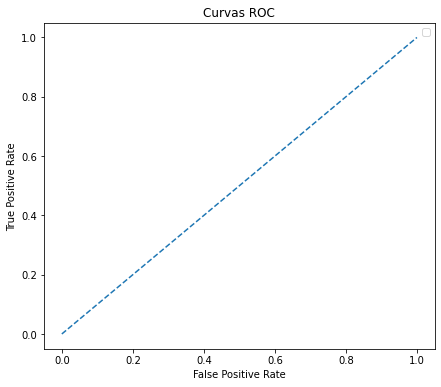

In [58]:

plt.figure(figsize=(7,6))
for name, (fpr, tpr) in y_probas.items():
    if fpr is not None:
        plt.plot(fpr, tpr, label=f"{name} (AUC={results[name]['roc_auc']:.3f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC")
plt.legend()
plt.show()


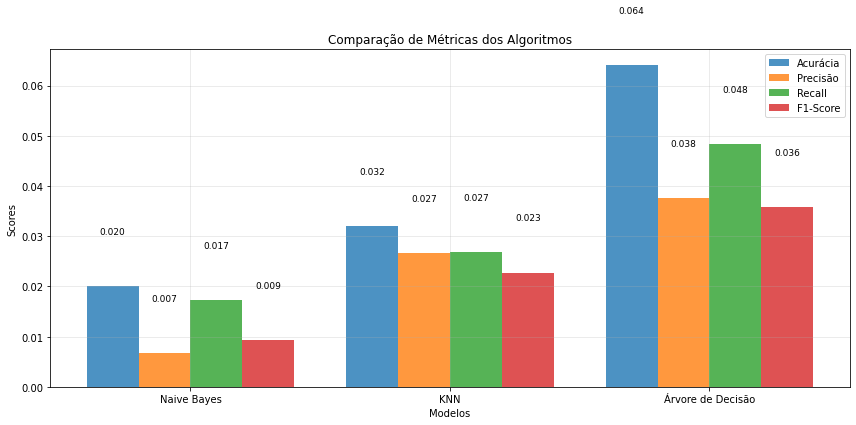

Análise completa finalizada!


In [59]:
# Comparação visual das métricas
models = list(results.keys())
accuracies = [results[model]['accuracy'] for model in models]
precisions = [results[model]['precision_macro'] for model in models]
recalls = [results[model]['recall_macro'] for model in models]
f1_scores = [results[model]['f1_macro'] for model in models]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - 1.5*width, accuracies, width, label='Acurácia', alpha=0.8)
ax.bar(x - 0.5*width, precisions, width, label='Precisão', alpha=0.8)
ax.bar(x + 0.5*width, recalls, width, label='Recall', alpha=0.8)
ax.bar(x + 1.5*width, f1_scores, width, label='F1-Score', alpha=0.8)

ax.set_xlabel('Modelos')
ax.set_ylabel('Scores')
ax.set_title('Comparação de Métricas dos Algoritmos')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True, alpha=0.3)

# Adicionar valores nas barras
for i, model in enumerate(models):
    ax.text(i - 1.5*width, accuracies[i] + 0.01, f'{accuracies[i]:.3f}', 
            ha='center', va='bottom', fontsize=9)
    ax.text(i - 0.5*width, precisions[i] + 0.01, f'{precisions[i]:.3f}', 
            ha='center', va='bottom', fontsize=9)
    ax.text(i + 0.5*width, recalls[i] + 0.01, f'{recalls[i]:.3f}', 
            ha='center', va='bottom', fontsize=9)
    ax.text(i + 1.5*width, f1_scores[i] + 0.01, f'{f1_scores[i]:.3f}', 
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("Análise completa finalizada!")